<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Euromillions_powerlaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main Numbers Frequency: [(29, 7), (24, 6), (25, 6), (41, 6), (3, 5), (14, 5), (23, 4), (42, 4), (33, 4), (47, 4), (22, 3), (44, 3), (1, 3), (11, 3), (20, 3), (43, 3), (4, 3), (36, 3), (21, 3), (10, 3), (49, 3), (37, 3), (19, 3), (8, 3), (27, 3), (35, 3), (17, 2), (5, 2), (26, 2), (40, 2), (31, 2), (46, 2), (45, 2), (39, 2), (30, 2), (6, 2), (15, 2), (18, 2), (12, 2), (50, 2), (38, 1), (9, 1), (2, 1), (48, 1), (28, 1), (16, 1), (34, 1), (7, 1)]
Lucky Stars Frequency: [(6, 7), (9, 7), (5, 6), (8, 6), (10, 5), (7, 4), (4, 4), (12, 4), (11, 3), (2, 3), (1, 3), (3, 2)]
Scaling Exponent (alpha): 0.5252202809524406


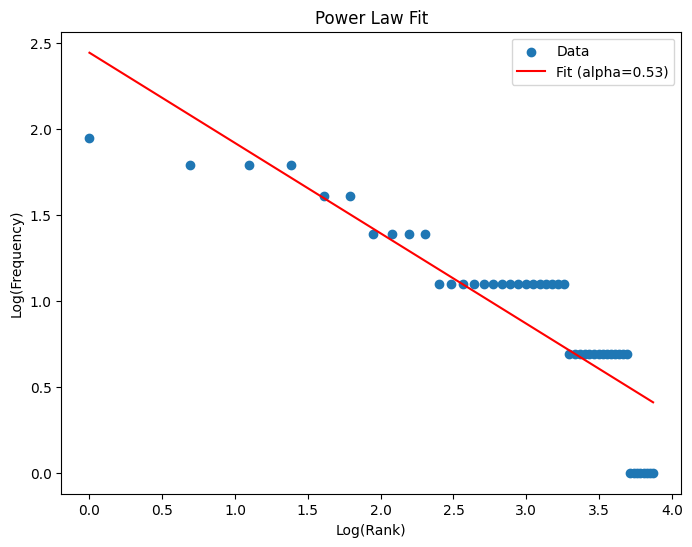

Number 1 belongs to Cluster 1
Number 2 belongs to Cluster 1
Number 3 belongs to Cluster 1
Number 4 belongs to Cluster 1
Number 5 belongs to Cluster 1
Number 6 belongs to Cluster 0
Number 7 belongs to Cluster 2
Number 8 belongs to Cluster 1
Number 9 belongs to Cluster 0
Number 10 belongs to Cluster 0
Number 11 belongs to Cluster 1
Number 12 belongs to Cluster 0
Number 13 belongs to Cluster 1
Number 14 belongs to Cluster 1
Number 15 belongs to Cluster 1
Number 16 belongs to Cluster 0
Number 17 belongs to Cluster 1
Number 18 belongs to Cluster 0
Number 19 belongs to Cluster 1
Number 20 belongs to Cluster 0
Number 21 belongs to Cluster 0
Number 22 belongs to Cluster 1
Number 23 belongs to Cluster 1
Number 24 belongs to Cluster 0
Number 25 belongs to Cluster 1
Number 26 belongs to Cluster 1
Number 27 belongs to Cluster 1
Number 28 belongs to Cluster 0
Number 29 belongs to Cluster 1
Number 30 belongs to Cluster 0
Number 31 belongs to Cluster 0
Number 32 belongs to Cluster 1
Number 33 belongs

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import linregress, chisquare, ks_2samp
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Define historical data
# Each draw is represented as [main_numbers, lucky_stars]
historical_draws = [
    [17, 22, 23, 24, 44, 6, 11],
    [1, 3, 11, 20, 43, 2, 11],
    [5, 14, 25, 26, 40, 5, 7],
    [4, 14, 31, 36, 38, 3, 10],
    [3, 21, 36, 41, 46, 1, 6],
    [10, 23, 24, 29, 45, 8, 10],
    [3, 4, 29, 39, 43, 5, 10],
    [22, 30, 41, 44, 49, 2, 7],
    [9, 37, 41, 42, 49, 1, 9],
    [2, 11, 19, 30, 49, 3, 8],
    [6, 8, 14, 27, 41, 4, 5],
    [8, 15, 24, 35, 42, 6, 8],
    [18, 20, 29, 41, 48, 5, 9],
    [12, 27, 36, 37, 42, 6, 7],
    [20, 33, 35, 41, 47, 4, 12],
    [3, 19, 29, 35, 37, 1, 9],
    [19, 24, 26, 28, 33, 8, 12],
    [12, 22, 27, 33, 45, 4, 8],
    [6, 10, 16, 23, 24, 11, 12],
    [10, 14, 21, 33, 50, 6, 9],
    [1, 3, 4, 21, 29, 2, 7],
    [1, 15, 25, 42, 50, 4, 10],
    [5, 24, 25, 29, 47, 5, 9],
    [14, 25, 39, 44, 47, 6, 10],
    [23, 25, 34, 46, 47, 6, 8],
    [8, 17, 18, 29, 43, 5, 9],
    [7, 11, 25, 31, 40, 9, 12],
]

# Step 2: Frequency Analysis
main_number_frequency = defaultdict(int)
lucky_star_frequency = defaultdict(int)

for draw in historical_draws:
    main_numbers, lucky_stars = draw[:5], draw[5:]
    for num in main_numbers:
        main_number_frequency[num] += 1
    for star in lucky_stars:
        lucky_star_frequency[star] += 1

sorted_main_numbers = sorted(main_number_frequency.items(), key=lambda x: x[1], reverse=True)
sorted_lucky_stars = sorted(lucky_star_frequency.items(), key=lambda x: x[1], reverse=True)

print("Main Numbers Frequency:", sorted_main_numbers)
print("Lucky Stars Frequency:", sorted_lucky_stars)

# Step 3: Power Law Fitting
ranks = np.arange(1, len(sorted_main_numbers) + 1)
frequencies = [freq for _, freq in sorted_main_numbers]

log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)
alpha = -slope

print(f"Scaling Exponent (alpha): {alpha}")

plt.figure(figsize=(8, 6))
plt.scatter(log_ranks, log_frequencies, label="Data")
plt.plot(log_ranks, slope * log_ranks + intercept, color='red', label=f"Fit (alpha={alpha:.2f})")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.title("Power Law Fit")
plt.legend()
plt.show()

# Step 4: Clustering Analysis
co_occurrence = defaultdict(lambda: defaultdict(int))

for draw in historical_draws:
    main_numbers = draw[:5]
    for i in range(len(main_numbers)):
        for j in range(i + 1, len(main_numbers)):
            num1, num2 = main_numbers[i], main_numbers[j]
            co_occurrence[num1][num2] += 1
            co_occurrence[num2][num1] += 1

co_occurrence_matrix = pd.DataFrame(co_occurrence).fillna(0)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(co_occurrence_matrix.T)

for i, cluster in enumerate(clusters):
    print(f"Number {i+1} belongs to Cluster {cluster}")

# Step 5: Machine Learning Prediction for Main Numbers
X_main = []  # Features: Previous draws (main numbers only)
y_main = []  # Labels: Next draw (main numbers only)

# Ensure X and y have consistent dimensions
for i in range(len(historical_draws) - 1):
    current_draw = historical_draws[i][:5]  # Main numbers from current draw
    next_draw = historical_draws[i + 1][:5]  # Main numbers from next draw

    # Pair each number in the current draw with the corresponding number in the next draw
    for j in range(5):
        X_main.append([current_draw[j]])
        y_main.append(next_draw[j])

# Convert X and y to NumPy arrays
X_main = np.array(X_main)
y_main = np.array(y_main)

# Split data into training and testing sets
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

# Train a Random Forest Classifier for main numbers
model_main = RandomForestClassifier(random_state=42)
model_main.fit(X_train_main, y_train_main)

# Predict and evaluate the model
y_pred_main = model_main.predict(X_test_main)
accuracy_main = accuracy_score(y_test_main, y_pred_main)
print(f"Model Accuracy (Main Numbers): {accuracy_main:.2f}")

# Predict probabilities for all numbers
all_numbers_main = np.array([[num] for num in range(1, 51)])  # All possible main numbers
probabilities_main = model_main.predict_proba(all_numbers_main)

top_numbers_main = [num for _, num in sorted(zip([p[1] for p in probabilities_main], range(1, 51)), reverse=True)[:5]]
print("Predicted Main Numbers:", top_numbers_main)

# Step 6: Machine Learning Prediction for Lucky Stars
X_stars = []  # Features: Previous draws (lucky stars only)
y_stars = []  # Labels: Next draw (lucky stars only)

# Ensure X and y have consistent dimensions
for i in range(len(historical_draws) - 1):
    current_stars = historical_draws[i][5:]  # Lucky stars from current draw
    next_stars = historical_draws[i + 1][5:]  # Lucky stars from next draw

    # Pair each star in the current draw with the corresponding star in the next draw
    for j in range(2):
        X_stars.append([current_stars[j]])
        y_stars.append(next_stars[j])

# Convert X and y to NumPy arrays
X_stars = np.array(X_stars)
y_stars = np.array(y_stars)

# Split data into training and testing sets
X_train_stars, X_test_stars, y_train_stars, y_test_stars = train_test_split(X_stars, y_stars, test_size=0.2, random_state=42)

# Train a Random Forest Classifier for lucky stars
model_stars = RandomForestClassifier(random_state=42)
model_stars.fit(X_train_stars, y_train_stars)

# Predict and evaluate the model
y_pred_stars = model_stars.predict(X_test_stars)
accuracy_stars = accuracy_score(y_test_stars, y_pred_stars)
print(f"Model Accuracy (Lucky Stars): {accuracy_stars:.2f}")

# Predict probabilities for all stars
all_numbers_stars = np.array([[num] for num in range(1, 13)])  # All possible lucky stars
probabilities_stars = model_stars.predict_proba(all_numbers_stars)

top_numbers_stars = [num for _, num in sorted(zip([p[1] for p in probabilities_stars], range(1, 13)), reverse=True)[:2]]
print("Predicted Lucky Stars:", top_numbers_stars)

# Step 7: Statistical Validation
# Observed frequencies for main numbers
observed_freq_main = [main_number_frequency.get(num, 0) for num in range(1, 51)]

# Scale expected frequencies to match observed frequencies for main numbers
total_observed_main = sum(observed_freq_main)
expected_freq_main = [total_observed_main / 50] * 50  # Uniform expectation scaled to match total observed

# Perform chi-square test for main numbers
chi_stat_main, chi_p_main = chisquare(observed_freq_main, f_exp=expected_freq_main)
print(f"Chi-Square Test (Main Numbers): Statistic={chi_stat_main}, p-value={chi_p_main}")

# Observed frequencies for lucky stars
observed_freq_stars = [lucky_star_frequency.get(num, 0) for num in range(1, 13)]

# Scale expected frequencies to match observed frequencies for lucky stars
total_observed_stars = sum(observed_freq_stars)
expected_freq_stars = [total_observed_stars / 12] * 12  # Uniform expectation scaled to match total observed

# Perform chi-square test for lucky stars
chi_stat_stars, chi_p_stars = chisquare(observed_freq_stars, f_exp=expected_freq_stars)
print(f"Chi-Square Test (Lucky Stars): Statistic={chi_stat_stars}, p-value={chi_p_stars}")

# Perform Kolmogorov-Smirnov test for main numbers
uniform_dist_main = np.random.uniform(1, 51, size=len(historical_draws) * 5)
ks_stat_main, ks_p_main = ks_2samp(uniform_dist_main, [num for draw in historical_draws for num in draw[:5]])
print(f"Kolmogorov-Smirnov Test (Main Numbers): Statistic={ks_stat_main}, p-value={ks_p_main}")

# Perform Kolmogorov-Smirnov test for lucky stars
uniform_dist_stars = np.random.uniform(1, 13, size=len(historical_draws) * 2)
ks_stat_stars, ks_p_stars = ks_2samp(uniform_dist_stars, [num for draw in historical_draws for num in draw[5:]])
print(f"Kolmogorov-Smirnov Test (Lucky Stars): Statistic={ks_stat_stars}, p-value={ks_p_stars}")